# Results of simulation of different fairness policies

These experiments use accumulated deficits to try to ensure that applications always receive their computed allocation of GPU time, even in the event of new jobs coming in and old jobs finishing, by keeping track of the difference between the GPU time the application should have received, and the GPU time the application actually received. Allocation of jobs to GPUs is performed in a round-based fashion, with GPUs instructed to run jobs for a fixed interval of time on all GPUs.

# Import statements

In [1]:
# Imports for plotting.
from matplotlib import pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import matplotlib.lines as mlines
import matplotlib.patches as mpatches
from matplotlib.ticker import MultipleLocator
from pylab import *
import seaborn as sns
from matplotlib import rc
rc('text',
   usetex=True)
sns.set_style('ticks')
font = {
    'font.family':'Times New Roman',
    'font.weight': 200,
    'font.size': 10,
}
sns.set_style(font)
flatui = ['#002A5E', '#FD151B', '#8EBA42', '#348ABD', '#988ED5', '#BDB76B', '#8EBA42', '#FFB5B8']
sns.set_palette(flatui)
paper_rc = {
    'lines.linewidth': 3,
    'lines.markersize': 10,
    'mathtext.fontset': 'custom',
    'mathtext.rm': 'Times New Roman',
    'mathtext.bf': 'Times New Roman:bold',
}
sns.set_context("paper", font_scale=2,  rc=paper_rc)
current_palette = sns.color_palette()

In [2]:
# Other imports.
import os
import re

# Parse logfile

In [3]:
def parse_logfile(logfile_name):
    runtimes = {}
    with open(logfile_name, 'r') as f:
        for line in f:
            m = re.match(
                r'\[Policy=(.*), Number of active jobs=(\d+), '
                 'Cluster\_spec=(.*)\] (\d+\.\d+) seconds', line)
            if m is None: continue
            policy = m.group(1)
            num_active_jobs = int(m.group(2))
            cluster_spec = eval(m.group(3))
            runtime = float(m.group(4))
            if policy not in runtimes:
                runtimes[policy] = []
            runtimes[policy].append((num_active_jobs, cluster_spec, runtime))
    return runtimes

In [4]:
runtimes = \
    parse_logfile("/lfs/1/deepak/gpusched/scheduler/logs/runtimes.out")

# Plotting functions

In [5]:
labels = {"fifo": "FIFO",
          "fifo_perf": "FIFO+perf",
          "fifo_packed": "FIFO+perf+packed",
          "max_min_fairness": "LAS",
          "max_min_fairness_perf": "LAS+perf",
          "max_min_fairness_packed": "LAS+perf+packed"}

def plot_runtime_vs_num_active_jobs(runtimes,
                                    policies,
                                    cluster_spec,
                                    output_filename=None):
    plt.figure(figsize=(8, 3.5))
    ax = plt.subplot2grid((1, 1), (0, 0), colspan=1)

    for policy in policies:
        x_values = []
        y_values = []

        if policy not in runtimes:
            continue
        runtimes_per_policy = runtimes[policy]
        for x in runtimes_per_policy:
            if x[1] != cluster_spec:
                continue
                
            x_values.append(x[0])
            y_values.append(x[2])

        ax.plot(x_values, y_values, marker='o',
                label=labels[policy])

    ax.axhline(y=1920, color='k', linestyle='--',
               linewidth=2)
    ax.set_xscale('log', basex=2)
    ax.set_xlim([0, 1028])
    ax.set_ylim([0, None])
    ax.set_xlabel("Number of active jobs")
    ax.set_ylabel("Runtime (seconds)")
    sns.despine()
    
    plt.legend()
    
    if output_filename is not None:
        with PdfPages(output_filename) as pdf:
            pdf.savefig(bbox_inches='tight')
    
    plt.show()

/lfs/1/keshav2/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:35: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.


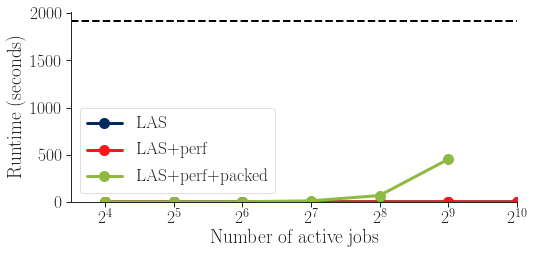

In [6]:
plot_runtime_vs_num_active_jobs(runtimes, ["max_min_fairness",
                                           "max_min_fairness_perf",
                                           "max_min_fairness_packed"],
                                {"v100": 64, "p100": 0, "k80": 0},
                                output_filename="runtimes/single_gpu_mmf_v100=64_p100=0_k80=0.pdf")

/lfs/1/keshav2/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:35: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.


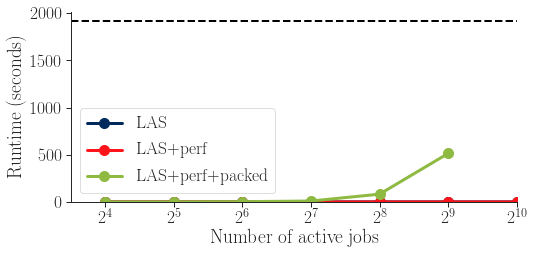

In [7]:
plot_runtime_vs_num_active_jobs(runtimes, ["max_min_fairness",
                                           "max_min_fairness_perf",
                                           "max_min_fairness_packed"],
                                {"v100": 36, "p100": 36, "k80": 36},
                                output_filename="runtimes/single_gpu_mmf_v100=36_p100=36_k80=36.pdf")